# Honey Production

## Introduction
We have been hearing about the decline in honeybee population in USA but as a **Data Scientist** we don't just trust the words and believe it to be true. So, we decided to investigate the truth. The source of our data was [Kaggle | Honey Production in USA](https://www.kaggle.com/jessicali9530/honey-production)
<br>
<br>
The Contents of the data are as follows:
<br>
<br>
`state`: Refers to the state of USA with abbreviated terms
<br>
`numcol`: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
<br>
`yieldpercol`: Honey yield per colony. Unit is pounds
<br>
`totalprod`: Total production (numcol x yieldpercol). Unit is pounds
<br>
`stocks`: Refers to stocks held by producers. Unit is pounds
<br>
`priceperlb`: Refers to average price per pound based on expanded sales. Unit is dollars.
<br>
`prodvalue`: Value of production (totalprod x priceperlb). Unit is dollars.
<br>
`year`: Year of observation

## Import Required Libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression

## Load Data

In [72]:
honeyprod = pd.read_csv("honeyproduction.csv")
honeyprod.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


## Investigate Data

In [73]:
honeyprod.describe(include = "all")

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,NaN,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,NaN,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,NaN,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,NaN,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,NaN,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000


Apparently our data was collected from **44 states**
<br>
By looking at numcol, totalprod, stocks, prodvalue we conclude the presence of outliers

## Deal with Missing Values

In [74]:
honeyprod.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

## Histograms

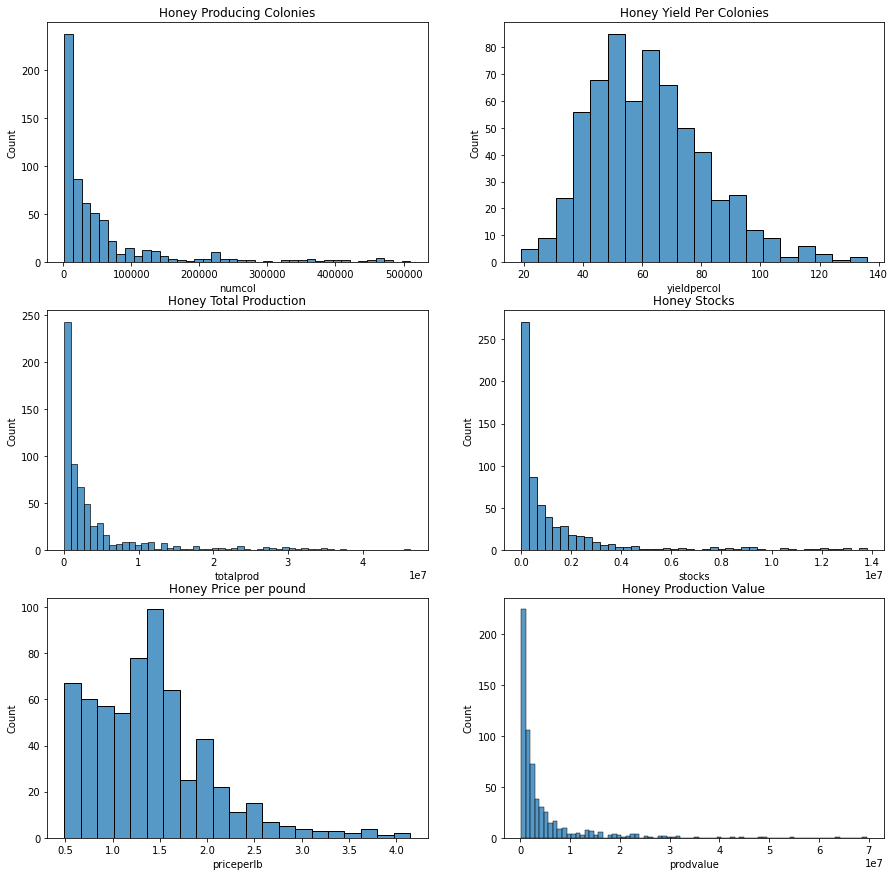

<Figure size 432x288 with 0 Axes>

In [75]:
#plt.figure()
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

sns.histplot(ax = axes[0, 0], data = honeyprod, x = "numcol")
axes[0, 0].set_title("Honey Producing Colonies")

sns.histplot(ax = axes[0, 1], data = honeyprod, x = "yieldpercol")
axes[0, 1].set_title("Honey Yield Per Colonies")

sns.histplot(ax = axes[1, 0], data = honeyprod, x = "totalprod")
axes[1, 0].set_title("Honey Total Production")

sns.histplot(ax = axes[1, 1], data = honeyprod, x = "stocks")
axes[1, 1].set_title("Honey Stocks")

sns.histplot(ax = axes[2, 0], data = honeyprod, x = "priceperlb")
axes[2, 0].set_title("Honey Price per pound")

sns.histplot(ax = axes[2, 1], data = honeyprod, x = "prodvalue")
axes[2, 1].set_title("Honey Production Value")

plt.show()
plt.clf()

## Data per Year

In [76]:
prod_per_year = honeyprod.groupby('year').agg({'numcol': "sum", 
                                                'totalprod':'sum', 
                                                'stocks':'sum', 
                                                'priceperlb': 'mean'}).reset_index()
prod_per_year['yieldpercol'] = prod_per_year['totalprod'] / prod_per_year['numcol']
prod_per_year['prodvalue'] = prod_per_year['totalprod'] * prod_per_year['priceperlb']
prod_per_year

,year,numcol,totalprod,stocks,priceperlb,yieldpercol,prodvalue
0,1998,2621000.0,219519000.0,80565000.0,0.832558,83.753911,1.827623e+08
1,1999,2637000.0,202387000.0,78390000.0,0.804186,76.748957,1.627568e+08
2,2000,2604000.0,219558000.0,84956000.0,0.791395,84.315668,1.737572e+08
3,2001,2542000.0,185748000.0,64764000.0,0.911818,73.071597,1.693684e+08
4,2002,2565000.0,171265000.0,39177000.0,1.371364,66.769981,2.348666e+08
5,2003,2591000.0,181372000.0,40619000.0,1.494773,70.000772,2.711099e+08
6,2004,2539000.0,182729000.0,60981000.0,1.284634,71.968885,2.347399e+08
7,2005,2394000.0,173969000.0,62187000.0,1.195122,72.668755,2.079142e+08
8,2006,2378000.0,154238000.0,60235000.0,1.303659,64.860387,2.010737e+08
9,2007,2428000.0,147621000.0,52405000.0,1.438293,60.799423,2.123222e+08


### Investigate per Year Data

In [77]:
prod_per_year.describe(include = "all")

,year,numcol,totalprod,stocks,priceperlb,yieldpercol,prodvalue
count,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,15.000000,15.000000,1.500000e+01
mean,2005.000000,2.515867e+06,1.739899e+08,5.504040e+07,1.421911,69.020845,2.379436e+08
std,4.472136,1.026080e+05,2.548030e+07,1.709175e+07,0.491251,8.498239,5.895309e+07
min,1998.000000,2.326000e+06,1.409070e+08,3.166200e+07,0.791395,56.160622,1.627568e+08
25%,2001.500000,2.447000e+06,1.509295e+08,3.989800e+07,1.053470,62.829905,1.919180e+08
50%,2005.000000,2.539000e+06,1.739690e+08,5.240500e+07,1.371364,70.000772,2.347399e+08
75%,2008.500000,2.597500e+06,1.842385e+08,6.347550e+07,1.718805,72.870176,2.680194e+08
max,2012.000000,2.666000e+06,2.195580e+08,8.495600e+07,2.367000,84.315668,3.381421e+08


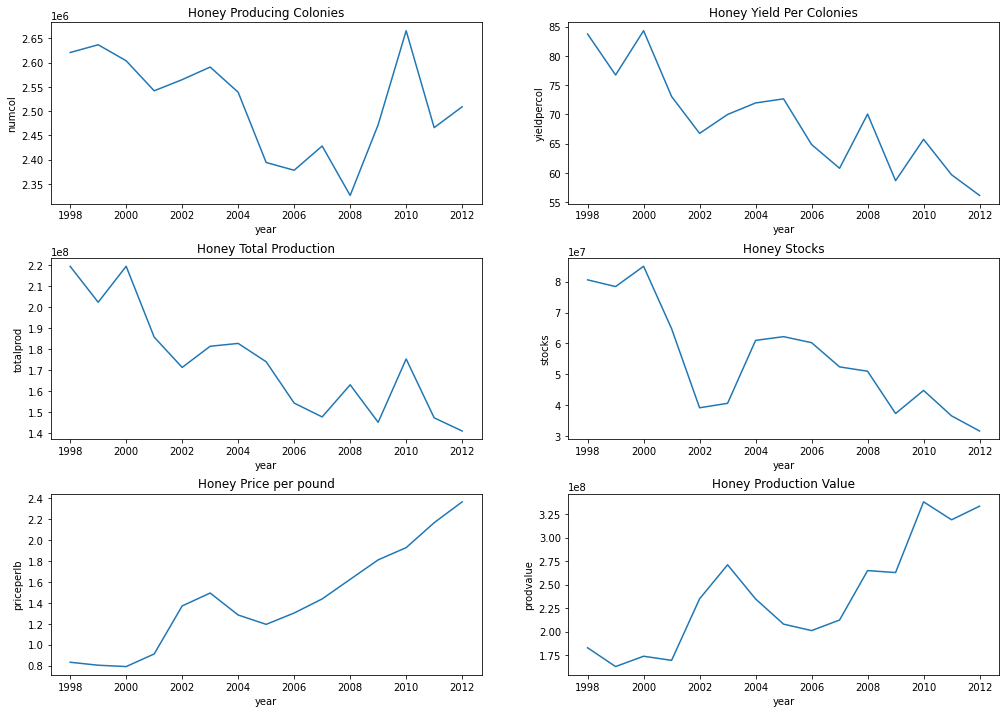

<Figure size 432x288 with 0 Axes>

In [78]:
fig, axes = plt.subplots(3, 2, figsize = (17, 12))
plt.subplots_adjust(hspace = 0.3)

sns.lineplot(ax = axes[0, 0], data = prod_per_year, y = "numcol", x = "year")
axes[0, 0].set_title("Honey Producing Colonies")

sns.lineplot(ax = axes[0, 1], data = prod_per_year, y = "yieldpercol", x = "year")
axes[0, 1].set_title("Honey Yield Per Colonies")

sns.lineplot(ax = axes[1, 0], data = prod_per_year, y = "totalprod", x = "year")
axes[1, 0].set_title("Honey Total Production")

sns.lineplot(ax = axes[1, 1], data = prod_per_year, y = "stocks", x = "year")
axes[1, 1].set_title("Honey Stocks")

sns.lineplot(ax = axes[2, 0], data = prod_per_year, y = "priceperlb", x = "year")
axes[2, 0].set_title("Honey Price per pound")

sns.lineplot(ax = axes[2, 1], data = prod_per_year, y = "prodvalue", x = "year")
axes[2, 1].set_title("Honey Production Value")

plt.show()
plt.clf()

## Linear Regression Model

### Check for Multic-colinearity

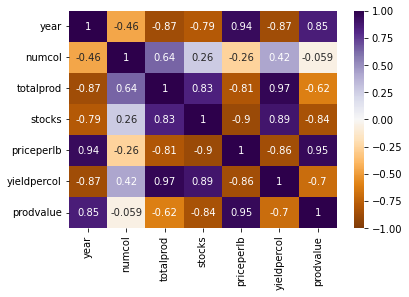

<Figure size 432x288 with 0 Axes>

In [79]:
corr_grid = prod_per_year.corr()
sns.heatmap(corr_grid,
            xticklabels = corr_grid.columns,
            yticklabels = corr_grid.columns,
            vmin = -1, center = 0, vmax = 1,
            annot = True, cmap = "PuOr")
plt.show()
plt.clf()

yeah! ofcourse we will not be taking `yieldpercol` and `prodvalue` as independent variable.
<br>
Apparently `priceperlb` and `stocks` are showing high correlation so we will be dropping `priceperlb` here.

In [80]:
final_df = prod_per_year.drop(columns = ['yieldpercol', 'prodvalue', 'priceperlb'])
final_df

,year,numcol,totalprod,stocks
0,1998,2621000.0,219519000.0,80565000.0
1,1999,2637000.0,202387000.0,78390000.0
2,2000,2604000.0,219558000.0,84956000.0
3,2001,2542000.0,185748000.0,64764000.0
4,2002,2565000.0,171265000.0,39177000.0
5,2003,2591000.0,181372000.0,40619000.0
6,2004,2539000.0,182729000.0,60981000.0
7,2005,2394000.0,173969000.0,62187000.0
8,2006,2378000.0,154238000.0,60235000.0
9,2007,2428000.0,147621000.0,52405000.0


### Dependent and Independent Variables

In [81]:
X = final_df[['year']]
y = final_df['totalprod']

### Build and Fit a Simple Linear Regression Model

In [82]:
model = LinearRegression()
model.fit(X, y)

# Slope
print(model.coef_)
# Intercept
print(model.intercept_)
# Accuracy Rsquared
print(model.score(X, y))

[-4951114.28571429]
10100974009.52381
0.755138616708127


### Prediction

In [83]:
y_predict = model.predict(X)
y_predict

array([2.08647667e+08, 2.03696552e+08, 1.98745438e+08, 1.93794324e+08,
       1.88843210e+08, 1.83892095e+08, 1.78940981e+08, 1.73989867e+08,
       1.69038752e+08, 1.64087638e+08, 1.59136524e+08, 1.54185410e+08,
       1.49234295e+08, 1.44283181e+08, 1.39332067e+08])

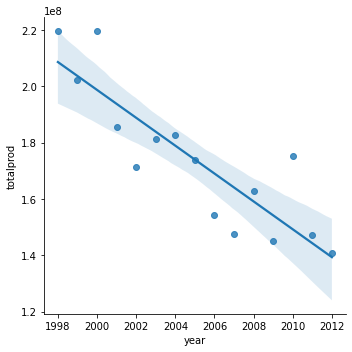

<Figure size 432x288 with 0 Axes>

In [84]:
sns.lmplot(x = "year", y = "totalprod", data = final_df)
plt.show()
plt.clf()

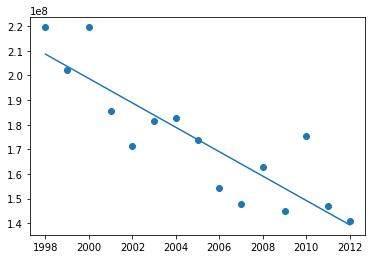

In [86]:
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.show()